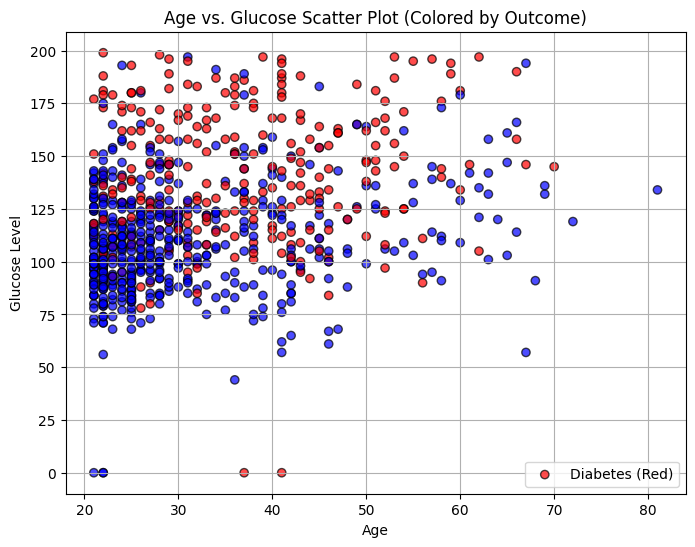

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("diabetes.csv")  # Replace with your actual CSV file path

# Scatter plot
plt.figure(figsize=(8, 6))
colors = df["Outcome"].map({0: 'blue', 1: 'red'})  # 0 = blue, 1 = red

plt.scatter(df["Age"], df["Glucose"], c=colors, alpha=0.7, edgecolors='k')

# Labels and title
plt.xlabel("Age")
plt.ylabel("Glucose Level")
plt.title("Age vs. Glucose Scatter Plot (Colored by Outcome)")
plt.legend(["Diabetes (Red)", "No Diabetes (Blue)"])
plt.grid(True)

# Show the plot
plt.show()

#### 🛠 Step 1: Load and Inspect the Data (Check for missing values, data types)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### 🛠 Step 2: Split Data into Features (X) and Target (y)

In [3]:
X = df.drop("Outcome", axis=1)
Y = df['Outcome']

#### 🛠 Step 3: Split Data into Training & Testing Sets

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#### 🛠 Step 4: Scale the Features

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler_X = StandardScaler()

In [8]:
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

#### Building the TensorFlow Model
#### 🛠 Step 1: Define the model architecture (Logistic Regression using a simple Neural Network).

In [10]:
import tensorflow as tf

# Define the Model with an Explicit Input Layer
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),  # Define input shape separately
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Show Model Summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

.

In [12]:
# Train the model
history = model.fit(X_train_scaled, Y_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, Y_test))

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5144 - loss: 0.7706 - val_accuracy: 0.5584 - val_loss: 0.7401
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5248 - loss: 0.7438 - val_accuracy: 0.5714 - val_loss: 0.7221
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5644 - loss: 0.7177 - val_accuracy: 0.5974 - val_loss: 0.7053
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5350 - loss: 0.7351 - val_accuracy: 0.6039 - val_loss: 0.6897
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5468 - loss: 0.6969 - val_accuracy: 0.6169 - val_loss: 0.6755
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5650 - loss: 0.7051 - val_accuracy: 0.6299 - val_loss: 0.6617
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5663 - loss: 0.7024 - val_accuracy: 0.6364 - val_loss: 0.6488
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5907 - loss: 0.6792 - val_accuracy: 0.6299 - val_loss:

In [13]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8317 - loss: 0.4516 
Test Loss: 0.4545
Test Accuracy: 0.8247


In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions
Y_pred_probs = model.predict(X_test_scaled)  # Probabilities
Y_pred = (Y_pred_probs > 0.5).astype(int)  # Convert to 0 or 1

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:\n", classification_report(Y_test, Y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Confusion Matrix:
 [[99  8]
 [19 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       107
           1       0.78      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.81      0.76      0.78       154
weighted avg       0.82      0.82      0.82       154



In [19]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Ensure Y_train is a NumPy array and 1D
y_train_np = np.ravel(np.array(Y_train))  # Converts to 1D array

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_np), y=y_train_np)

# Create class weight dictionary dynamically
class_weight_dict = {cls: weight for cls, weight in zip(np.unique(y_train_np), class_weights)}

print("Class Weight Dictionary:", class_weight_dict)

Class Weight Dictionary: {0: 0.7811704834605598, 1: 1.3891402714932126}


In [21]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train_np shape:", y_train_np.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("Y_test shape:", Y_test.shape)

X_train_scaled shape: (614, 8)
y_train_np shape: (614,)
X_test_scaled shape: (154, 8)
Y_test shape: (154,)


In [23]:
y_train_np = np.array(Y_train)  # Convert to NumPy array
y_train_np = np.ravel(y_train_np)  # Flatten to 1D if needed

In [25]:
print("Class Weight Dictionary:", class_weight_dict)
print("Unique labels in y_train_np:", np.unique(y_train_np))

Class Weight Dictionary: {0: 0.7811704834605598, 1: 1.3891402714932126}
Unique labels in y_train_np: [0 1]


In [28]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train_np), y=y_train_np)
class_weight_dict = dict(zip(np.unique(y_train_np), class_weights))

In [31]:
y_train_np = y_train_np.astype(np.float32)
Y_test = Y_test.astype(np.float32)


In [32]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder

# Convert labels to NumPy array
y_train_np = np.ravel(np.array(Y_train))
y_test_np = np.ravel(np.array(Y_test))

# Compute class weights correctly
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train_np), y=y_train_np)
class_weight_dict = dict(zip(np.unique(y_train_np), class_weights))

# Train model
model.fit(
    X_train_scaled,
    y_train_np,
    epochs=50,
    batch_size=16,
    class_weight=class_weight_dict,
    validation_data=(X_test_scaled, y_test_np)
)


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7485 - loss: 0.5513 - val_accuracy: 0.7792 - val_loss: 0.4576
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7431 - loss: 0.5407 - val_accuracy: 0.7857 - val_loss: 0.4585
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.7461 - loss: 0.5461 - val_accuracy: 0.7857 - val_loss: 0.4588
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7492 - loss: 0.5353 - val_accuracy: 0.7857 - val_loss: 0.4600
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7512 - loss: 0.5313 - val_accuracy: 0.7857 - val_loss: 0.4610
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7497 - loss: 0.5309 - val_accuracy: 0.7792 - val_loss: 0.4612
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.7314 - loss: 0.5516 - val_accuracy: 0.7727 - val_loss: 0.4615
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7408 - loss: 0.5290 - val_accuracy: 0.7727 - val_l

In [33]:
y_pred_prob = model.predict(X_test_scaled)  # Get probability scores
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to 0 or 1
accuracy = np.mean(y_pred.flatten() == Y_test)  # Compare predictions
print(f"Manual Accuracy: {accuracy:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step
Manual Accuracy: 0.7727


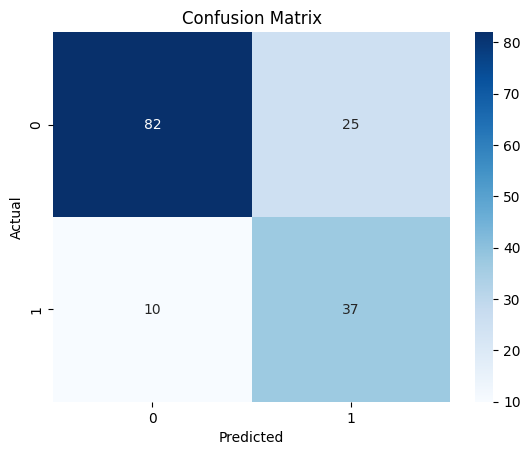

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


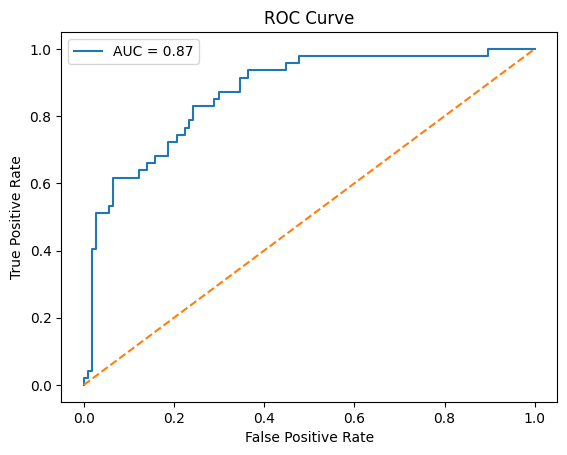

In [35]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(Y_test, y_pred_prob)
auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
